In [113]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')
%matplotlib inline
import glob
import os
from collections import Counter
import pandas as pd
import time
import cv2

from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.layers import Dense, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Sequential

In [114]:
def load_data(path):
    x_train=[]
    y_train=[]
    x_test=[]
    y_test=[]
    split=0.3

    folders=os.listdir(path)
    for folder in folders:
        i=0
        images_in_folder=os.listdir(path+folder)
        split_size=len(images_in_folder)*split
        for image in images_in_folder:
            i+=1
            #img=Image.open(path+folder+'/'+image)#.convert('LA')
            img=cv2.imread(path+folder+'/'+image)
            image_array=np.array(img)
            gray = cv2.cvtColor(image_array, cv2.COLOR_BGR2GRAY)
            image_array=cv2.resize(image_array,(150,150))
            if i>=split_size:
                x_train.append(image_array)
                y_train.append(folder)
            else:
                x_test.append(image_array)
                y_test.append(folder)

    return (np.array(x_train),np.array(y_train)),(np.array(x_test),np.array(y_test))

In [115]:
batch_size = 20
num_classes = 2
epochs = 50
img_x, img_y = 150,150
path="C:/Users/hp/machine_learning/mouse_clicking/training_data/"

In [116]:
(x_train, y_train), (x_test, y_test) = load_data(path)

In [117]:
x_train[0].shape

(150, 150, 3)

In [118]:
y_train[y_train=="palm"]=0
y_train[y_train=="fist"]=1
y_test[y_test=="palm"]=0
y_test[y_test=="fist"]=1

In [119]:
x_train = x_train.reshape(x_train.shape[0], img_x, img_y, 3)
x_test = x_test.reshape(x_test.shape[0], img_x, img_y, 3)
input_shape = (img_x, img_y, 3)

In [120]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (280, 150, 150, 3)
280 train samples
118 test samples


In [121]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [93]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1),
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(1000, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

In [94]:
class AccuracyHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.acc = []

    def on_epoch_end(self, batch, logs={}):
        self.acc.append(logs.get('acc'))

In [95]:
history = AccuracyHistory()

In [96]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test),
          callbacks=[history])

Train on 280 samples, validate on 118 samples
Epoch 1/50
280/280 [==============================] - 2s 7ms/step - loss: 0.7045 - acc: 0.6607 - val_loss: 0.6316 - val_acc: 0.7034
Epoch 2/50
280/280 [==============================] - 1s 3ms/step - loss: 0.6151 - acc: 0.7000 - val_loss: 0.6141 - val_acc: 0.7034
Epoch 3/50
280/280 [==============================] - 1s 3ms/step - loss: 0.6016 - acc: 0.7000 - val_loss: 0.5948 - val_acc: 0.7034
Epoch 4/50
280/280 [==============================] - 1s 3ms/step - loss: 0.5922 - acc: 0.7000 - val_loss: 0.5967 - val_acc: 0.7034
Epoch 5/50
280/280 [==============================] - 1s 3ms/step - loss: 0.5987 - acc: 0.7071 - val_loss: 0.6069 - val_acc: 0.7119
Epoch 6/50
280/280 [==============================] - 1s 2ms/step - loss: 0.5711 - acc: 0.7071 - val_loss: 0.5931 - val_acc: 0.7373
Epoch 7/50
280/280 [==============================] - 1s 2ms/step - loss: 0.6012 - acc: 0.6893 - val_loss: 0.5995 - val_acc: 0.7119
Epoch 8/50
280/280 [==========

Test loss: 0.9724984744847831
Test accuracy: 0.8050847508139529


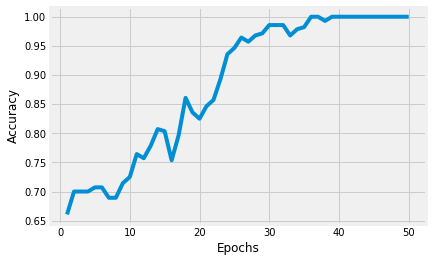

In [97]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
plt.plot(range(1, epochs+1), history.acc)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [98]:
model_yaml = model.to_yaml()
with open("fist_palm_cnn_model.yaml", "w") as yaml_file:
    yaml_file.write(model_yaml)
# serialize weights to HDF5
model.save_weights("fist_palm_cnn_model.h5")
print("Saved model to disk")

Saved model to disk
